## Problem Definition


This project is a supervised classification problem, as it involves training a model on labeled data (images of cats and dogs) to predict the category of new, unseen images.

The task highlights the use of deep learning to automate feature extraction and solve a traditionally challenging computer vision problem.

```
Resources
Feature Set: pickled dataset of images (X.pickle), containing raw image data.
Target Set: pickled dataset of labels (y.pickle), indicating whether an image is a cat or dog.
Test Image: single image (dog.jpg) to validate trained model.
```

# Images – To Do List



Prior to starting this problem, be sure to enable the GPU runtime processing in your Jupyter notebook.



```
Keras is a Python library that is used to fit neural networks.

The following are the common steps you want to take when fitting a neural network using keras:
Load data
Define keras model
Compile model
Fit model
Evaluate model
Use model for prediction
```

11_23_24_2c-Deep.Learning.Example.ipynb


* Write a concise problem definition for the project. Put it in a text field at the top of your Jupyter notebook.

* Load necessary packages.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

import tensorflow as tf
import tensorflow.keras as keras

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Data Collection



* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.



In [2]:
url_X = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'

In [3]:
!curl -O {url_X}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  237M  100  237M    0     0  15.6M      0  0:00:15  0:00:15 --:--:-- 19.1M


```
% Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                               Dload   Upload  Total   Spent    Left  Speed
100  237M  100  237M    0     0  24.5M      0  0:00:09  0:00:09 --:--:-- 27.3M
```

In [4]:
data_X = pd.read_pickle(url_X)
data_X


array([[[[ 95],
         [ 94],
         [ 98],
         ...,
         [170],
         [172],
         [171]],

        [[ 92],
         [ 91],
         [ 95],
         ...,
         [170],
         [172],
         [171]],

        [[ 89],
         [ 91],
         [ 92],
         ...,
         [165],
         [169],
         [169]],

        ...,

        [[ 84],
         [ 76],
         [ 73],
         ...,
         [135],
         [164],
         [154]],

        [[ 82],
         [ 79],
         [ 71],
         ...,
         [142],
         [134],
         [153]],

        [[ 80],
         [ 85],
         [ 85],
         ...,
         [151],
         [146],
         [138]]],


       [[[171],
         [154],
         [139],
         ...,
         [185],
         [187],
         [188]],

        [[146],
         [140],
         [129],
         ...,
         [187],
         [187],
         [188]],

        [[128],
         [132],
         [128],
         ...,
         [186],
         [

In [5]:
data_X.shape

(24946, 100, 100, 1)

In [6]:
type(data_X)

numpy.ndarray

In [7]:
url_y = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'

In [8]:
!curl -O {url_y}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49948  100 49948    0     0  63269      0 --:--:-- --:--:-- --:--:-- 63225


```
 % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49948  100 49948    0     0   115k      0 --:--:-- --:--:-- --:--:--  115k
```

In [9]:
data_y = pd.read_pickle(url_y)
data_y

[0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [10]:
type(data_y)

list

In [11]:
len(data_y)

24946

## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [12]:
data_Xscaled = data_X / 255
data_Xscaled

array([[[[0.37254902],
         [0.36862745],
         [0.38431373],
         ...,
         [0.66666667],
         [0.6745098 ],
         [0.67058824]],

        [[0.36078431],
         [0.35686275],
         [0.37254902],
         ...,
         [0.66666667],
         [0.6745098 ],
         [0.67058824]],

        [[0.34901961],
         [0.35686275],
         [0.36078431],
         ...,
         [0.64705882],
         [0.6627451 ],
         [0.6627451 ]],

        ...,

        [[0.32941176],
         [0.29803922],
         [0.28627451],
         ...,
         [0.52941176],
         [0.64313725],
         [0.60392157]],

        [[0.32156863],
         [0.30980392],
         [0.27843137],
         ...,
         [0.55686275],
         [0.5254902 ],
         [0.6       ]],

        [[0.31372549],
         [0.33333333],
         [0.33333333],
         ...,
         [0.59215686],
         [0.57254902],
         [0.54117647]]],


       [[[0.67058824],
         [0.60392157],
         [0.54

## Exploratory Data Analysis



* Look at the shape of X and y. Ensure that X is 4 dimensional.



In [13]:
data_Xscaled.shape

(24946, 100, 100, 1)

In [14]:
data_X.shape

(24946, 100, 100, 1)

```
Original data_X and data_Xscaled are 4 dimensional
(24946, 100, 100, 1)
```

In [15]:
len(data_y)

24946

```
data_y is a list and cannot obtain shape, used length=
24946
```

* Plot a few ( >5 ) of the images in X using plt.imshow().

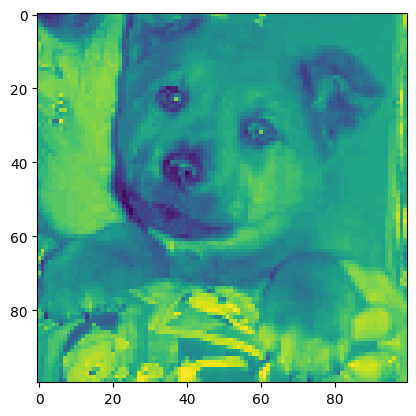

In [16]:
plt.imshow(data_Xscaled[11555])

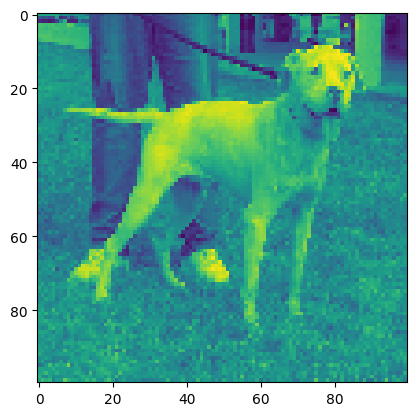

In [17]:
plt.imshow(data_Xscaled[8277])

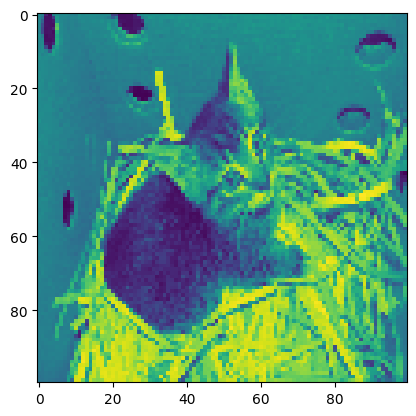

In [18]:
plt.imshow(data_Xscaled[2071])

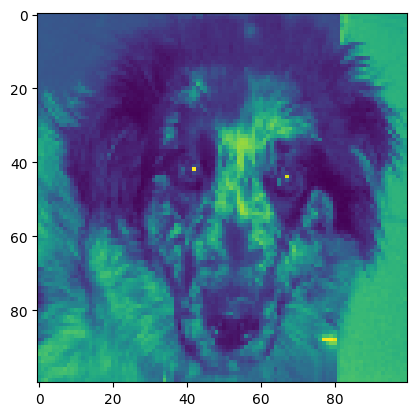

In [19]:
plt.imshow(data_Xscaled[23488])

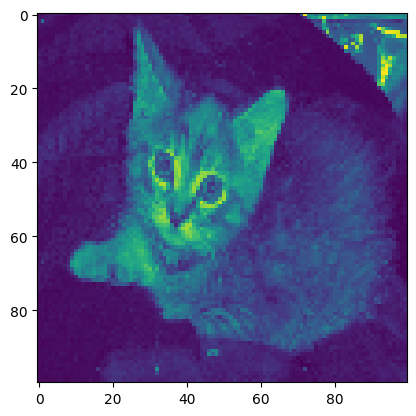

In [20]:
plt.imshow(data_Xscaled[927])


* Look at the response values in y for those images.

In [21]:
print(data_y[927])
print(data_y[2071])
print(data_y[11555])
print(data_y[23488])
print(data_y[8277])

1
1
0
0
0


```
Images data_y values
Looks like dogs == 0 and cats == 1
[927]       1
[2071]      1
[11555]     0
[23488]     0
[8277]      0

```

* Hint: you may want to start with a random subset to get familiar with the process of building a NN.  Then go through the process again with the full set.

```
With for loop iterate through range of indices in data_Xscaled (from 444 through 484 by increments of 10)
```

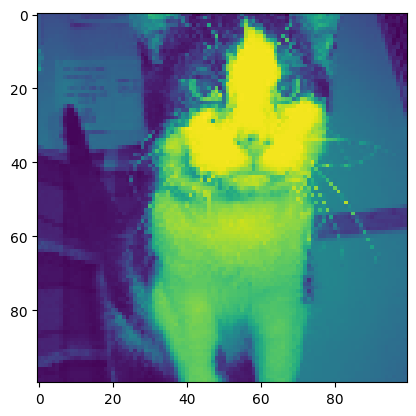

In [22]:
for c in range(444,485,10):
  plt.imshow(data_Xscaled[c])

In [49]:
# Subset Selection for Demonstration
subset_size = 1000
random_indices = np.random.choice(data_Xscaled.shape[0], size=subset_size, replace=False)
data_Xscaledsub = data_Xscaled[random_indices]
data_ysub = np.array(data_y)[random_indices]

## Data Processing



* Split X and y into training and testing sets.

*  Build a convolutional neural network with the following:
  * Sequential layers
  * At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  * A dense output layer using the 'sigmoid' activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.

* Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.

* Fit your model using the training set.

* Evaluate your model using the testing set.

* Plot the distribution of probabilities for the testing set.

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: [numpy.reshape]( https://numpy.org/doc/stable/reference/generated/numpy.reshape.html )

* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

* Use the neural network you created to predict whether the image is a dog or a cat.



* Split X and y into training and testing sets.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data_Xscaledsub, data_ysub, test_size = 0.25, random_state = 42)

* Build a convolutional neural network with the following:
  * Sequential layers

In [51]:
model = Sequential()

*
  
  * At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).



In [60]:
#Define input layer
model.add(
  Conv2D(
    name = "conv_input",
    input_shape = X_train.shape[1:],
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
    MaxPooling2D(pool_size=(2,2))
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Input 0 of layer "conv_input" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 8)

In [54]:
# Define second hidden layer
model.add(
  Conv2D(
    name = "hidden1",
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
  MaxPooling2D(pool_size=(2,2))
)


*
 * A dense output layer using the 'sigmoid' activation function.

    Note: you can play around with the number of layers and nodes to try to get better performance.

In [61]:
# Flatten data to be used in output layer
model.add(
    Flatten()
)

# Define output layer
model.add(
  Dense(
    name = "output",
    units = 8,
    activation = 'sigmoid'
  )
)

ValueError: Input 0 of layer "conv_input" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 8)

* Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.

In [56]:
# Compile model
model.compile(
  optimizer = 'adam',  # Tells Keras model how to learn using algorithm which updates weights of neural network during training
  loss = 'binary_crossentropy', #Tells Keras what to aim for using fx measuring diff bt predicted prollys & true labels in trying to predict cat or dog
  metrics = ['accuracy'], #Tells Keras how to judge its model's performance measured by its accuracy in making predictions (% correctly classified examples)
)

* Fit your model using the training set.

In [ ]:
model.fit(X_train, y_train, epochs=8)

* Evaluate your model using the testing set.

In [57]:
# Actual training of neural network happening here
model.fit(X_train, y_train, epochs=10, batch_size=32)

#Model learns to distinguish between cats and dogs based on training data.

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 8)

* Plot the distribution of probabilities for the testing set.


* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: numpy.reshape

* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

In [ ]:
# https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg

* Use the neural network you created to predict whether the image is a dog or a cat.

## Communication of Results



* Communicate the results of your analysis.



## **BONUS** (optional)



* Upload an image of your (or your friend's or family's) dog or cat and use your model to predict whether the image is a dog or cat.
* Hint: you'll probably need to convert the image from color to grayscale.  OpenCV, pillow, and other libraries are your friend.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

# Data Collection
data_X = pd.read_pickle("https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle")
data_y = pd.read_pickle("https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle")

# Data Scaling
data_X_scaled = data_X / 255.0

# Subset Selection for Demonstration
subset_size = 1000
random_indices = np.random.choice(data_X_scaled.shape[0], size=subset_size, replace=False)
data_X_subset = data_X_scaled[random_indices]
data_y_subset = np.array(data_y)[random_indices]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(data_X_subset, data_y_subset, test_size=0.25, random_state=42)

# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the Model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


In [ ]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Collection
url_X = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'
!curl -O {url_X}
data_X = pd.read_pickle(url_X)
url_y = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'
!curl -O {url_y}
data_y = pd.read_pickle(url_y)

# Data Cleaning
data_Xscaled = data_X / 255

# Exploratory Data Analysis (subset for demonstration)
subset_size = 1000
random_indices = np.random.choice(data_Xscaled.shape[0], size=subset_size, replace=False)
data_Xscaledsub = data_Xscaled[random_indices]
data_ysub = np.array(data_y)[random_indices]

# Data Processing
X_train, X_test, y_train, y_test = train_test_split(data_Xscaledsub, data_ysub, test_size=0.25, random_state=42)

# Build the CNN Model (first attempt)
model = Sequential()
model.add(Conv2D(name="conv_input", input_shape=X_train.shape[1:], filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(name="hidden1", filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(name="output", units=8, activation='sigmoid'))

# Compile the Model (first attempt)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)  # Training the model



# Build the CNN Model (second attempt)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the Model (second attempt)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the Model (second attempt)
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the Model (second attempt)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")